In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('E:/Python/DS_Salary_Project/glassdoor_jobs.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df

Unnamed: 0                                          Job Title  \
0             0                                     Data Scientist   
1             1                          Healthcare Data Scientist   
2             2                                     Data Scientist   
3             3                                     Data Scientist   
4             4                                     Data Scientist   
5             5                                     Data Scientist   
6             6                                     Data Scientist   
7             7                                     Data Scientist   
8             8                                 Research Scientist   
9             9                                     Data Scientist   
10           10                                     Data Scientist   
11           11                                     Data Scientist   
12           12                  Staff Data Scientist - Technology   
13           13                                       Data Analyst   
14           14                                     Data Scientist   
15           15                                    Data Engineer I   
16           16                            Scientist I/II, Biology   
17           17                            Customer Data Scientist   
18           18             Data Scientist - Health Data Analytics   
19           19                                     Data Scientist   
20           20                                     Data Scientist   
21           21           Senior Data Scientist / Machine Learning   
22           22                      Data Scientist - Quantitative   
23           23                                     Data Scientist   
24           24                                     Data Scientist   
25           25                                     Data Scientist   
26           26                      Digital Health Data Scientist   
27           27                                     Data Scientist   
28           28                             Associate Data Analyst   
29           29                            Clinical Data Scientist   
30           30                                     Data Scientist   
31           31                                     Data Scientist   
32           32                                     Data Scientist   
33           33           Data Scientist / Machine Learning Expert   
34           34                                     Data Scientist   
35           35                                     Data Scientist   
36           36                                   Web Data Analyst   
37           37                                     Data Scientist   
38           38                                     Data Scientist   
39           39                              Senior Data Scientist   
40           40                                      Data Engineer   
41           41                                       Data Analyst   
42           42                                     Data Scientist   
43           43                                      Data Engineer   
44           44            Data Scientist - Algorithms & Inference   
45           45                                          Scientist   
46           46                              Senior Data Scientist   
47           47                               Data Science Analyst   
48           48                                     Data Scientist   
49           49                                Lead Data Scientist   
50           50                             Associate Data Analyst   
51           51                        Spectral Scientist/Engineer   
52           52  College Hire - Data Scientist - Open to Decemb...   
53           53                                      Data Engineer   
54           54                                     Data Scientist   
55           55             Data Scientist, Office of Data Science   
56           56

In [3]:
# Salary Parsing

df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)
df

Unnamed: 0                                          Job Title  \
0             0                                     Data Scientist   
1             1                          Healthcare Data Scientist   
2             2                                     Data Scientist   
3             3                                     Data Scientist   
4             4                                     Data Scientist   
5             5                                     Data Scientist   
6             6                                     Data Scientist   
7             7                                     Data Scientist   
8             8                                 Research Scientist   
9             9                                     Data Scientist   
10           10                                     Data Scientist   
11           11                                     Data Scientist   
12           12                  Staff Data Scientist - Technology   
13           13                                       Data Analyst   
14           14                                     Data Scientist   
15           15                                    Data Engineer I   
16           16                            Scientist I/II, Biology   
17           17                            Customer Data Scientist   
18           18             Data Scientist - Health Data Analytics   
19           19                                     Data Scientist   
20           20                                     Data Scientist   
21           21           Senior Data Scientist / Machine Learning   
22           22                      Data Scientist - Quantitative   
23           23                                     Data Scientist   
24           24                                     Data Scientist   
25           25                                     Data Scientist   
26           26                      Digital Health Data Scientist   
27           27                                     Data Scientist   
28           28                             Associate Data Analyst   
29           29                            Clinical Data Scientist   
30           30                                     Data Scientist   
31           31                                     Data Scientist   
32           32                                     Data Scientist   
33           33           Data Scientist / Machine Learning Expert   
34           34                                     Data Scientist   
35           35                                     Data Scientist   
36           36                                   Web Data Analyst   
37           37                                     Data Scientist   
38           38                                     Data Scientist   
39           39                              Senior Data Scientist   
40           40                                      Data Engineer   
41           41                                       Data Analyst   
42           42                                     Data Scientist   
43           43                                      Data Engineer   
44           44            Data Scientist - Algorithms & Inference   
45           45                                          Scientist   
46           46                              Senior Data Scientist   
47           47                               Data Science Analyst   
48           48                                     Data Scientist   
49           49                                Lead Data Scientist   
50           50                             Associate Data Analyst   
51           51                        Spectral Scientist/Engineer   
52           52  College Hire - Data Scientist - Open to Decemb...   
53           53                                      Data Engineer   
54           54                                     Data Scientist   
55           55             Data Scientist, Office of Data Science   
56           56

In [4]:
df = df[df['Salary Estimate'] != '-1']
salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])
salary

0                                     $53K-$91K 
1                                    $63K-$112K 
2                                     $80K-$90K 
3                                     $56K-$97K 
4                                    $86K-$143K 
5                                    $71K-$119K 
6                                     $54K-$93K 
7                                    $86K-$142K 
8                                     $38K-$84K 
9                                   $120K-$160K 
10                                  $126K-$201K 
11                                   $64K-$106K 
12                                  $106K-$172K 
13                                    $46K-$85K 
14                                   $83K-$144K 
15                                  $102K-$190K 
16                                   $67K-$137K 
17                                  $118K-$189K 
18                                  $110K-$175K 
19                                   $64K-$111K 
20                  

In [5]:
salary = salary.apply(lambda x: x.replace('K', '').replace('$', ''))
salary = salary.apply(lambda x: x.replace('Per Hour', '').replace('Employer Provided Salary:', ''))
salary

0        53-91 
1       63-112 
2        80-90 
3        56-97 
4       86-143 
5       71-119 
6        54-93 
7       86-142 
8        38-84 
9      120-160 
10     126-201 
11      64-106 
12     106-172 
13       46-85 
14      83-144 
15     102-190 
16      67-137 
17     118-189 
18     110-175 
19      64-111 
20      81-130 
21      73-119 
22      86-139 
23      63-105 
25     109-177 
26      63-110 
27      75-124 
28       34-61 
29      63-105 
30       80-90 
31       56-97 
32      72-120 
33      86-143 
34      93-149 
35      85-140 
36      77-135 
37      82-132 
38      83-137 
39     115-180 
40      74-138 
41      64-112 
43      68-129 
44     110-175 
45      52-113 
46      110-150
48      150-160
49     158-211 
50       20-39 
51      56-117 
52       63-99 
54      68-114 
55      86-143 
56       41-95 
57      86-144 
58      80-139 
59       56-95 
60     120-189 
61     111-176 
62       54-93 
63      71-119 
65      82-132 
66      84-146 
67     1

In [6]:
# Creating copy of Dataframe to avoid the warning: 'SettingWithCopyWarning'
df = df.copy()

df['salary_min'] = salary.apply(lambda x: int(x.split('-')[0]))
df['salary_max'] = salary.apply(lambda x: int(x.split('-')[1]))
df['avg_salary'] = (df['salary_min'] + df['salary_max'])/2
df

Unnamed: 0                                          Job Title  \
0             0                                     Data Scientist   
1             1                          Healthcare Data Scientist   
2             2                                     Data Scientist   
3             3                                     Data Scientist   
4             4                                     Data Scientist   
5             5                                     Data Scientist   
6             6                                     Data Scientist   
7             7                                     Data Scientist   
8             8                                 Research Scientist   
9             9                                     Data Scientist   
10           10                                     Data Scientist   
11           11                                     Data Scientist   
12           12                  Staff Data Scientist - Technology   
13           13                                       Data Analyst   
14           14                                     Data Scientist   
15           15                                    Data Engineer I   
16           16                            Scientist I/II, Biology   
17           17                            Customer Data Scientist   
18           18             Data Scientist - Health Data Analytics   
19           19                                     Data Scientist   
20           20                                     Data Scientist   
21           21           Senior Data Scientist / Machine Learning   
22           22                      Data Scientist - Quantitative   
23           23                                     Data Scientist   
25           25                                     Data Scientist   
26           26                      Digital Health Data Scientist   
27           27                                     Data Scientist   
28           28                             Associate Data Analyst   
29           29                            Clinical Data Scientist   
30           30                                     Data Scientist   
31           31                                     Data Scientist   
32           32                                     Data Scientist   
33           33           Data Scientist / Machine Learning Expert   
34           34                                     Data Scientist   
35           35                                     Data Scientist   
36           36                                   Web Data Analyst   
37           37                                     Data Scientist   
38           38                                     Data Scientist   
39           39                              Senior Data Scientist   
40           40                                      Data Engineer   
41           41                                       Data Analyst   
43           43                                      Data Engineer   
44           44            Data Scientist - Algorithms & Inference   
45           45                                          Scientist   
46           46                              Senior Data Scientist   
48           48                                     Data Scientist   
49           49                                Lead Data Scientist   
50           50                             Associate Data Analyst   
51           51                        Spectral Scientist/Engineer   
52           52  College Hire - Data Scientist - Open to Decemb...   
54           54                                     Data Scientist   
55           55             Data Scientist, Office of Data Science   
56           56                               Data Science Analyst   
57           57                                     Data Scientist   
58           58                                     Data Scientist   
59           59                                     Data Scientist   
60           60

In [7]:
df[['Company Name', 'Rating']].sort_values(by=['Rating'])

Company Name  Rating
472                                         Kronos Bio    -1.0
518                                         Kronos Bio    -1.0
778                                         Kronos Bio    -1.0
703                                         Kronos Bio    -1.0
819                                         Kronos Bio    -1.0
208                                  CA-One Tech Cloud    -1.0
583                                               ALIN    -1.0
331                                  CA-One Tech Cloud    -1.0
943                                         Kronos Bio    -1.0
377                                               Muso    -1.0
741                            Monte Rosa Therapeutics    -1.0
726                                 Moda Operandi\n1.9     1.9
85                                 GNS Healthcare\n1.9     1.9
488                                 Moda Operandi\n1.9     1.9
804                              United BioSource\n2.1     2.1
642                             Cerus Corporation\n2.1     2.1
864                             Cerus Corporation\n2.1     2.1
431                             Cerus Corporation\n2.1     2.1
534                              United BioSource\n2.1     2.1
811                         Rodan and Fields, LLC\n2.2     2.2
382                             The Integer Group\n2.2     2.2
350                         Vanda Pharmaceuticals\n2.3     2.3
142                                       Synagro\n2.3     2.3
856                          Teasdale Latin Foods\n2.4     2.4
242                          Teasdale Latin Foods\n2.4     2.4
939                              Crown Bioscience\n2.4     2.4
429                          Teasdale Latin Foods\n2.4     2.4
467                              Crown Bioscience\n2.4     2.4
633                          Teasdale Latin Foods\n2.4     2.4
696                              Crown Bioscience\n2.4     2.4
293                                      comScore\n2.5     2.5
577                                        CareDx\n2.5     2.5
213                Software Engineering Institute\n2.6     2.6
870                Software Engineering Institute\n2.6     2.6
434                Software Engineering Institute\n2.6     2.6
880                         West Coast University\n2.6     2.6
645                Software Engineering Institute\n2.6     2.6
346                Software Engineering Institute\n2.6     2.6
168                Software Engineering Institute\n2.6     2.6
952                Software Engineering Institute\n2.6     2.6
816                Software Engineering Institute\n2.6     2.6
243                Software Engineering Institute\n2.6     2.6
709                Software Engineering Institute\n2.6     2.6
473                Software Engineering Institute\n2.6     2.6
455              Advanced BioScience Laboratories\n2.7     2.7
681              Advanced BioScience Laboratories\n2.7     2.7
523                                      FLEETCOR\n2.7     2.7
751              Advanced BioScience Laboratories\n2.7     2.7
827                                         Bridg\n2.7     2.7
554                             Change Healthcare\n2.7     2.7
250              Advanced BioScience Laboratories\n2.7     2.7
787                                      FLEETCOR\n2.7     2.7
300           State of Wisconsin Investment Board\n2.7     2.7
198           State of Wisconsin Investment Board\n2.7     2.7
80                               EAG Laboratories\n2.7     2.7
822              Advanced BioScience Laboratories\n2.7     2.7
500              Advanced BioScience Laboratories\n2.7     2.7
921              Advanced BioScience Laboratories\n2.7     2.7
131                                       DrFirst\n2.8     2.8
270  Community Action Partnership of San Luis Obisp...     2.8
72                                    Berg Health\n2.8     2.8
205                        Dodge Data & Analytics\n2.8     2.8
557                       1-800-FLOWERS.COM, Inc.\n2.8     2.8
325       

In [8]:
#Company name text only

df['company_txt'] = df.apply(lambda x: x['Company Name'] if x['Rating'] < 0 else x['Company Name'][:-3], axis=1)
df

Unnamed: 0                                          Job Title  \
0             0                                     Data Scientist   
1             1                          Healthcare Data Scientist   
2             2                                     Data Scientist   
3             3                                     Data Scientist   
4             4                                     Data Scientist   
5             5                                     Data Scientist   
6             6                                     Data Scientist   
7             7                                     Data Scientist   
8             8                                 Research Scientist   
9             9                                     Data Scientist   
10           10                                     Data Scientist   
11           11                                     Data Scientist   
12           12                  Staff Data Scientist - Technology   
13           13                                       Data Analyst   
14           14                                     Data Scientist   
15           15                                    Data Engineer I   
16           16                            Scientist I/II, Biology   
17           17                            Customer Data Scientist   
18           18             Data Scientist - Health Data Analytics   
19           19                                     Data Scientist   
20           20                                     Data Scientist   
21           21           Senior Data Scientist / Machine Learning   
22           22                      Data Scientist - Quantitative   
23           23                                     Data Scientist   
25           25                                     Data Scientist   
26           26                      Digital Health Data Scientist   
27           27                                     Data Scientist   
28           28                             Associate Data Analyst   
29           29                            Clinical Data Scientist   
30           30                                     Data Scientist   
31           31                                     Data Scientist   
32           32                                     Data Scientist   
33           33           Data Scientist / Machine Learning Expert   
34           34                                     Data Scientist   
35           35                                     Data Scientist   
36           36                                   Web Data Analyst   
37           37                                     Data Scientist   
38           38                                     Data Scientist   
39           39                              Senior Data Scientist   
40           40                                      Data Engineer   
41           41                                       Data Analyst   
43           43                                      Data Engineer   
44           44            Data Scientist - Algorithms & Inference   
45           45                                          Scientist   
46           46                              Senior Data Scientist   
48           48                                     Data Scientist   
49           49                                Lead Data Scientist   
50           50                             Associate Data Analyst   
51           51                        Spectral Scientist/Engineer   
52           52  College Hire - Data Scientist - Open to Decemb...   
54           54                                     Data Scientist   
55           55             Data Scientist, Office of Data Science   
56           56                               Data Science Analyst   
57           57                                     Data Scientist   
58           58                                     Data Scientist   
59           59                                     Data Scientist   
60           60

In [9]:
# state field

df['job_state'] = df['Location'].apply(lambda x: x.split(',')[1])

df['job_state'].value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 GA               6
 KY               6
 DE               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 RI               1
 SC               1
Name: job_state, dtype: int64

In [10]:
# Fix state Los Angeles
df['job_state'] = df['job_state'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df['job_state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [11]:
df['same_state'] = df.apply(lambda x: 1 if x.Location == x.Headquarters else 0, axis=1)
df

Unnamed: 0                                          Job Title  \
0             0                                     Data Scientist   
1             1                          Healthcare Data Scientist   
2             2                                     Data Scientist   
3             3                                     Data Scientist   
4             4                                     Data Scientist   
5             5                                     Data Scientist   
6             6                                     Data Scientist   
7             7                                     Data Scientist   
8             8                                 Research Scientist   
9             9                                     Data Scientist   
10           10                                     Data Scientist   
11           11                                     Data Scientist   
12           12                  Staff Data Scientist - Technology   
13           13                                       Data Analyst   
14           14                                     Data Scientist   
15           15                                    Data Engineer I   
16           16                            Scientist I/II, Biology   
17           17                            Customer Data Scientist   
18           18             Data Scientist - Health Data Analytics   
19           19                                     Data Scientist   
20           20                                     Data Scientist   
21           21           Senior Data Scientist / Machine Learning   
22           22                      Data Scientist - Quantitative   
23           23                                     Data Scientist   
25           25                                     Data Scientist   
26           26                      Digital Health Data Scientist   
27           27                                     Data Scientist   
28           28                             Associate Data Analyst   
29           29                            Clinical Data Scientist   
30           30                                     Data Scientist   
31           31                                     Data Scientist   
32           32                                     Data Scientist   
33           33           Data Scientist / Machine Learning Expert   
34           34                                     Data Scientist   
35           35                                     Data Scientist   
36           36                                   Web Data Analyst   
37           37                                     Data Scientist   
38           38                                     Data Scientist   
39           39                              Senior Data Scientist   
40           40                                      Data Engineer   
41           41                                       Data Analyst   
43           43                                      Data Engineer   
44           44            Data Scientist - Algorithms & Inference   
45           45                                          Scientist   
46           46                              Senior Data Scientist   
48           48                                     Data Scientist   
49           49                                Lead Data Scientist   
50           50                             Associate Data Analyst   
51           51                        Spectral Scientist/Engineer   
52           52  College Hire - Data Scientist - Open to Decemb...   
54           54                                     Data Scientist   
55           55             Data Scientist, Office of Data Science   
56           56                               Data Science Analyst   
57           57                                     Data Scientist   
58           58                                     Data Scientist   
59           59                                     Data Scientist   
60           60

In [12]:
# age of company 

df['age'] = df['Founded'].apply(lambda x: x if x<1 else 2022 - x)
df['age']

0       49
1       38
2       12
3       57
4       24
5       22
6       14
7       17
8        8
9       13
10      11
11      54
12      60
13      10
14     241
15      27
16      11
17      11
18      12
19     107
20      10
21       9
22      27
23      87
25      10
26     173
27      70
28     170
29     173
30      12
31      57
32      25
33      26
34      26
35      48
36      14
37      53
38      12
39     152
40      37
41      14
43      -1
44      12
45       7
46      29
48      -1
49      64
50      36
51      23
52      97
54      38
55     110
56      20
57     159
58      83
59     152
60      10
61       6
62      14
63      22
65     137
66      11
67      16
68      57
70      74
72      16
73      19
75      23
76      -1
77      83
78       7
79      95
80      44
81      12
82     162
83      83
84      11
85      22
86       5
87      27
88       6
89      25
90      80
91      14
92      20
93      74
94      60
95      17
96      14
97      26
99      23

In [13]:
#parsing of job description

#python
df['python_yn'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

#r studio 
df['R_yn'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)

#spark 
df['spark'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

#aws 
df['aws'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

#excel
df['excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

In [14]:
# Skills requirement in job description

print('Python: ', df['python_yn'][df['python_yn'] != 0].count(),
      '\nR Studio: ', df['R_yn'][df['R_yn'] != 0].count(),
      '\nSpark: ', df['spark'][df['spark'] != 0].count(),
      '\nAWS: ', df['aws'][df['aws'] != 0].count(),
      '\nExcel: ', df['excel'][df['excel'] != 0].count())

Python:  392 
R Studio:  2 
Spark:  392 
AWS:  392 
Excel:  388


In [15]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'salary_min', 'salary_max', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [16]:
df.drop(['Unnamed: 0'], axis=1)

Job Title  \
0                                       Data Scientist   
1                            Healthcare Data Scientist   
2                                       Data Scientist   
3                                       Data Scientist   
4                                       Data Scientist   
5                                       Data Scientist   
6                                       Data Scientist   
7                                       Data Scientist   
8                                   Research Scientist   
9                                       Data Scientist   
10                                      Data Scientist   
11                                      Data Scientist   
12                   Staff Data Scientist - Technology   
13                                        Data Analyst   
14                                      Data Scientist   
15                                     Data Engineer I   
16                             Scientist I/II, Biology   
17                             Customer Data Scientist   
18              Data Scientist - Health Data Analytics   
19                                      Data Scientist   
20                                      Data Scientist   
21            Senior Data Scientist / Machine Learning   
22                       Data Scientist - Quantitative   
23                                      Data Scientist   
25                                      Data Scientist   
26                       Digital Health Data Scientist   
27                                      Data Scientist   
28                              Associate Data Analyst   
29                             Clinical Data Scientist   
30                                      Data Scientist   
31                                      Data Scientist   
32                                      Data Scientist   
33            Data Scientist / Machine Learning Expert   
34                                      Data Scientist   
35                                      Data Scientist   
36                                    Web Data Analyst   
37                                      Data Scientist   
38                                      Data Scientist   
39                               Senior Data Scientist   
40                                       Data Engineer   
41                                        Data Analyst   
43                                       Data Engineer   
44             Data Scientist - Algorithms & Inference   
45                                           Scientist   
46                               Senior Data Scientist   
48                                      Data Scientist   
49                                 Lead Data Scientist   
50                              Associate Data Analyst   
51                         Spectral Scientist/Engineer   
52   College Hire - Data Scientist - Open to Decemb...   
54                                      Data Scientist   
55              Data Scientist, Office of Data Science   
56                                Data Science Analyst   
57                                      Data Scientist   
58                                      Data Scientist   
59                                      Data Scientist   
60                                      Data Scientist   
61                                      Data Scientist   
62                                      Data Scientist   
63                                      Data Scientist   
65                               Senior Data Scientist   
66                                      Data Scientist   
67                          Senior Risk Data Scientist   
68   Data Scientist in Artificial Intelligence Earl...   
70                                      Data Scientist   
72                                      Data Scientist   
73                                      Data Scientist   
75                           Data Scientist - Research   
76                                      Dat

In [17]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [18]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [19]:
df['job_simp'].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [20]:
df['seniority'] = df['Job Title'].apply(seniority)

In [21]:
df['seniority'].value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [22]:
#  Job description length 

df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       2536
1       4783
2       3461
3       3883
4       2728
5       3747
6       1786
7       3804
8       1538
9       4574
10      2757
11      3490
12      3934
13      4897
14      3731
15      1889
16      3639
17      4163
18      3512
19      4397
20      2918
21      6909
22      6408
23      2907
25      3760
26      3698
27      4420
28      4900
29      5015
30      3461
31      3883
32      3342
33      5045
34      2327
35      2161
36      1739
37      5000
38      3703
39      3555
40      1739
41      3053
43      1996
44      3833
45      3550
46      9120
48      3213
49      7286
50      3412
51      2682
52      2739
54      2915
55      4244
56      1629
57      4734
58      4448
59      3543
60      4203
61      5020
62      1786
63      3747
65      4804
66      1382
67      2933
68      4945
70      2493
72      1939
73      3081
75      8397
76      2306
77      2291
78      1886
79      2903
80      2653
81      4427
82      2609
83      4295
84      3405

In [23]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != -1 else 0)
#Competitor count
df['num_comp']

0      1
1      1
2      1
3      3
4      3
5      3
6      1
7      1
8      1
9      2
10     1
11     1
12     3
13     1
14     3
15     1
16     3
17     1
18     1
19     1
20     3
21     1
22     1
23     1
25     3
26     1
27     1
28     1
29     1
30     1
31     3
32     1
33     1
34     1
35     3
36     1
37     1
38     1
39     1
40     1
41     3
43     1
44     1
45     3
46     3
48     1
49     3
50     1
51     3
52     3
54     1
55     3
56     1
57     3
58     1
59     1
60     3
61     2
62     1
63     3
65     1
66     1
67     1
68     3
70     3
72     1
73     1
75     4
76     1
77     1
78     1
79     1
80     1
81     3
82     3
83     1
84     1
85     1
86     1
87     3
88     1
89     1
90     3
91     3
92     1
93     1
94     3
95     1
96     1
97     1
99     1
101    3
102    1
104    1
105    1
106    3
107    3
108    3
109    3
110    1
112    1
113    3
116    3
117    3
118    3
119    1
120    3
122    1
123    3
124    3
125    2
1

In [24]:
#hourly wage to annual 

df['salary_min'] = df.apply(lambda x: x.salary_min*2 if x.hourly == 1 else x.salary_min, axis=1)
df['salary_min'] = df.apply(lambda x: x.salary_max*2 if x.hourly == 1 else x.salary_max, axis=1)

In [25]:
df[df.hourly == 1][['hourly', 'salary_min', 'salary_max']]

hourly  salary_min  salary_max
197       1          48          24
209       1          68          34
240       1          50          25
247       1          68          34
257       1          50          25
307       1          48          24
337       1          68          34
427       1          50          25
437       1          78          39
456       1          68          34
464       1          56          28
522       1          58          29
523       1          34          17
632       1          50          25
652       1          78          39
682       1          68          34
694       1          56          28
786       1          58          29
787       1          34          17
823       1          94          47
854       1          50          25
875       1          78          39
919       1          68          34
936       1          56          28

In [26]:
df['company_txt'] = df['company_txt'].apply(lambda x: x.replace('\n', ''))
df['company_txt']

0                                      Tecolote Research
1                  University of Maryland Medical System
2                                                KnowBe4
3                                                   PNNL
4                                     Affinity Solutions
5                                               CyrusOne
6                                     ClearOne Advantage
7                                             Logic20/20
8                              Rochester Regional Health
9                                               <intent>
10                                                  Wish
11                                               ManTech
12                                               Walmart
13                                                Yesler
14                                Takeda Pharmaceuticals
15                                               Audible
16                                   Blueprint Medicines
17                             

In [27]:
df.describe()

Unnamed: 0      Rating      Founded      hourly  employer_provided  \
count  742.000000  742.000000   742.000000  742.000000         742.000000   
mean   469.129380    3.618868  1837.154987    0.032345           0.022911   
std    279.793117    0.801210   497.183763    0.177034           0.149721   
min      0.000000   -1.000000    -1.000000    0.000000           0.000000   
25%    221.500000    3.300000  1939.000000    0.000000           0.000000   
50%    472.500000    3.700000  1988.000000    0.000000           0.000000   
75%    707.750000    4.000000  2007.000000    0.000000           0.000000   
max    955.000000    5.000000  2019.000000    1.000000           1.000000   

       salary_min  salary_max  avg_salary  same_state         age   python_yn  \
count  742.000000  742.000000  742.000000  742.000000  742.000000  742.000000   
mean   128.149596  127.183288  100.626011    0.557951   48.456873    0.528302   
std     45.220324   46.909006   38.855948    0.496965   53.900445    0.499535   
min     16.000000   16.000000   13.500000    0.000000   -1.000000    0.000000   
25%     96.000000   96.000000   73.500000    0.000000   13.000000    0.000000   
50%    124.000000  124.000000   97.500000    1.000000   26.000000    1.000000   
75%    155.000000  155.000000  122.500000    1.000000   61.000000    1.000000   
max    306.000000  306.000000  254.000000    1.000000  278.000000    1.000000   

             R_yn       spark         aws       excel      desc_len  \
count  742.000000  742.000000  742.000000  742.000000    742.000000   
mean     0.002695    0.528302    0.528302    0.522911   3869.545822   
std      0.051882    0.499535    0.499535    0.499812   1521.495868   
min      0.000000    0.000000    0.000000    0.000000    407.000000   
25%      0.000000    0.000000    0.000000    0.000000   2801.000000   
50%      0.000000    1.000000    1.000000    1.000000   3731.000000   
75%      0.000000    1.000000    1.000000    1.000000   4740.000000   
max      1.000000    1.000000    1.000000    1.000000  10051.000000   

         num_comp  
count  742.000000  
mean     1.673854  
std      0.918451  
min      1.000000  
25%      1.000000  
50%      1.000000  
75%      3.000000  
max      4.000000

In [28]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'salary_min', 'salary_max', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

<AxesSubplot:>

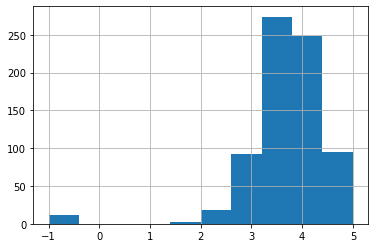

In [29]:
df.Rating.hist()

<AxesSubplot:>

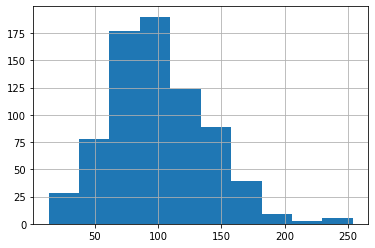

In [30]:
df.avg_salary.hist()

<AxesSubplot:>

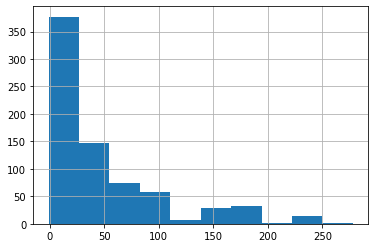

In [31]:
df.age.hist()

<AxesSubplot:>

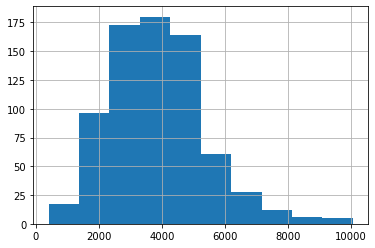

In [32]:
df.desc_len.hist()

<AxesSubplot:>

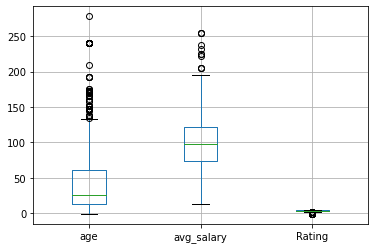

In [33]:
df.boxplot(column = ['age', 'avg_salary', 'Rating'])

<AxesSubplot:>

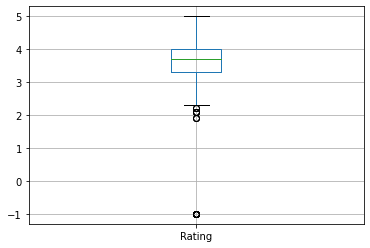

In [34]:
df.boxplot(column = ['Rating'])

In [35]:
df[['age','avg_salary','Rating','desc_len','num_comp']].corr()

age  avg_salary    Rating  desc_len  num_comp
age         1.000000    0.019492  0.024665  0.164461  0.139044
avg_salary  0.019492    1.000000  0.013492  0.078808  0.088790
Rating      0.024665    0.013492  1.000000 -0.012281  0.021395
desc_len    0.164461    0.078808 -0.012281  1.000000  0.109321
num_comp    0.139044    0.088790  0.021395  0.109321  1.000000

<AxesSubplot:>

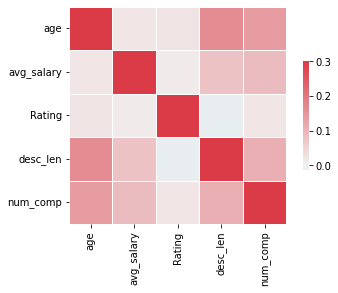

In [36]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(), vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink":.5})

In [37]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'salary_min', 'salary_max', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [38]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry',
             'Sector', 'Revenue', 'company_txt', 'job_state', 'same_state',
             'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total 200


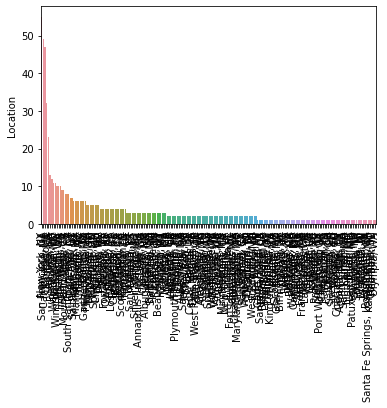

graph for Headquarters: total 198


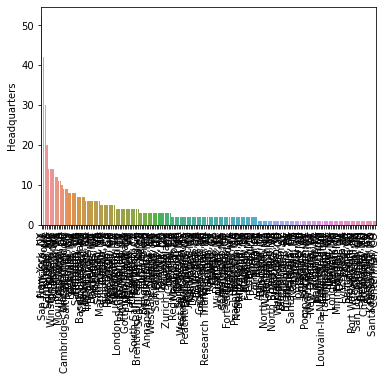

graph for Size: total 9


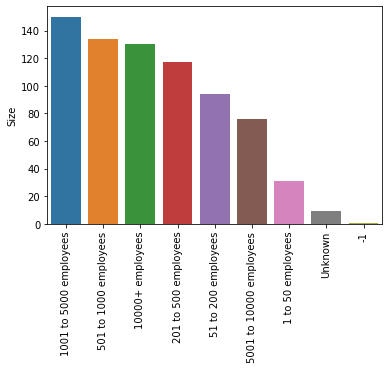

graph for Type of ownership: total 11


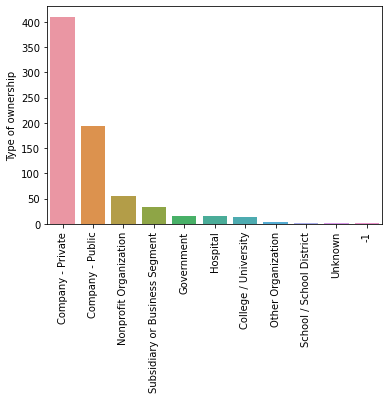

graph for Industry: total 60


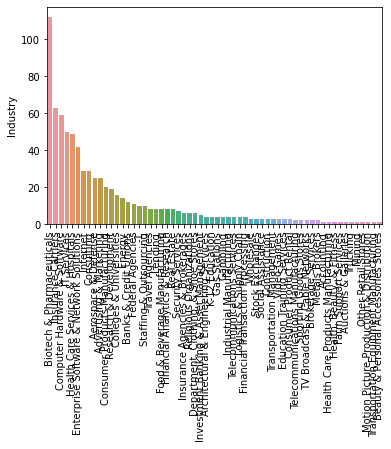

graph for Sector: total 25


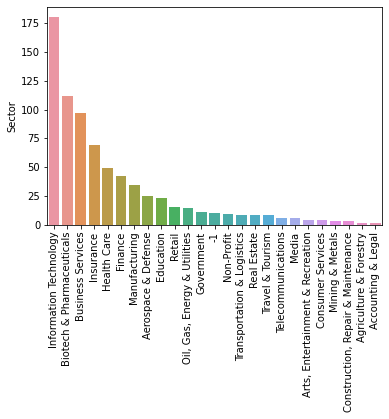

graph for Revenue: total 14


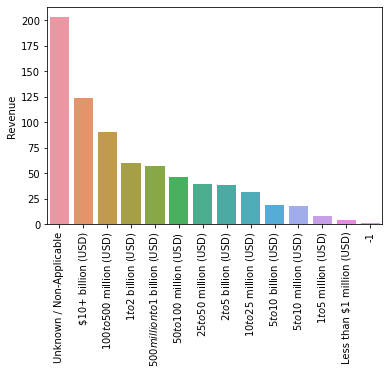

graph for company_txt: total 343


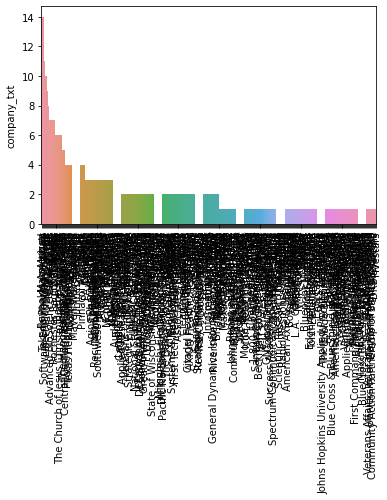

graph for job_state: total 37


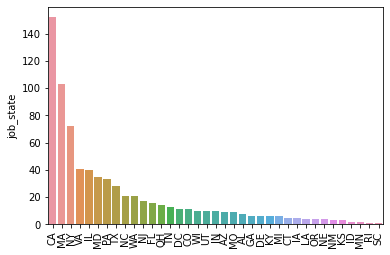

graph for same_state: total 2


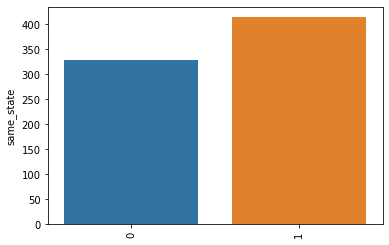

graph for python_yn: total 2


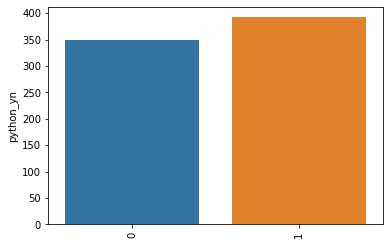

graph for R_yn: total 2


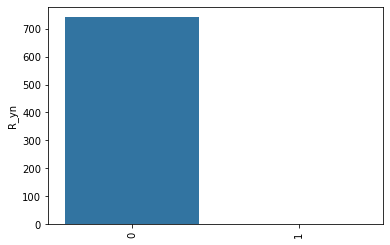

graph for spark: total 2


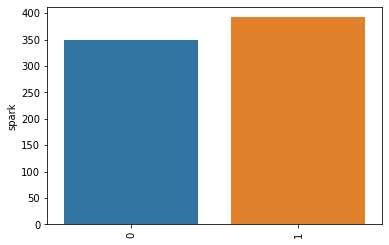

graph for aws: total 2


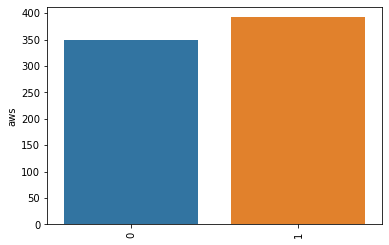

graph for excel: total 2


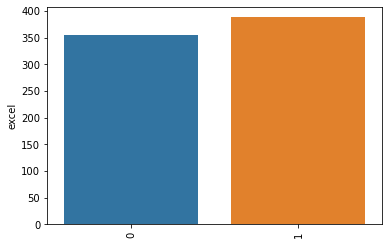

graph for job_simp: total 7


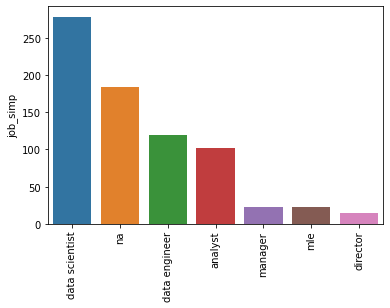

graph for seniority: total 3


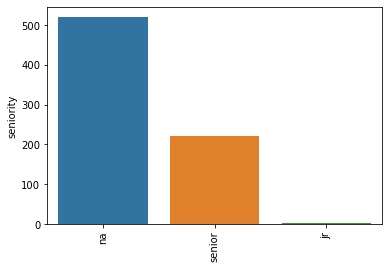

In [39]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total %d" %(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


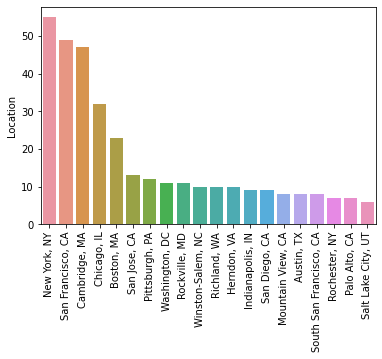

graph for Headquarters: total = 20


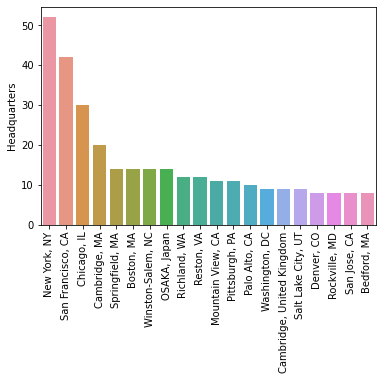

graph for company_txt: total = 20


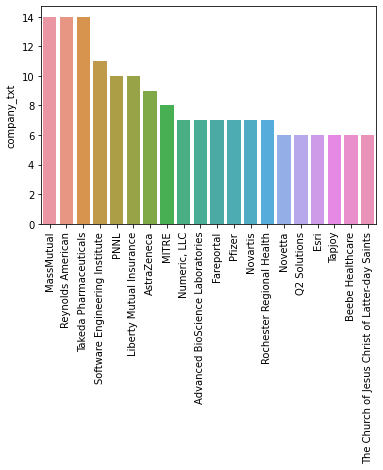

In [40]:
for i in df_cat[['Location', 'Headquarters', 'company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [41]:
pd.pivot_table(df, index='job_simp', values='avg_salary')

avg_salary
job_simp                  
analyst          65.857843
data engineer   105.403361
data scientist  117.564516
director        168.607143
manager          84.022727
mle             126.431818
na               84.853261

In [42]:
pd.pivot_table(df, index=['job_simp', 'seniority'], values='avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [43]:
pd.pivot_table(df, index=['job_state', 'job_simp'], values='avg_salary').sort_values('job_state', ascending=False)

avg_salary
job_state job_simp                  
WI        na               54.000000
          data scientist  113.500000
          analyst          58.833333
WA        na               97.500000
          data scientist   99.764706
          analyst          54.500000
VA        na               79.300000
          mle              87.000000
          data scientist  108.416667
          data engineer    96.900000
          analyst          71.583333
UT        data engineer   100.333333
          analyst          54.750000
          data scientist  140.500000
TX        na               41.285714
          data scientist  100.730769
          data engineer   113.062500
TN        data scientist   96.000000
          data engineer   100.950000
          analyst          13.500000
SC        na               60.500000
RI        analyst         100.000000
PA        manager         109.666667
          data engineer    91.500000
          data scientist  113.333333
          analyst          62.750000
          mle             120.500000
          na               76.062500
OR        data scientist   98.500000
          data engineer    73.000000
OH        na               91.166667
          data scientist  105.285714
          analyst          53.875000
NY        na               81.583333
          mle             125.000000
          data scientist  115.250000
          data engineer    86.375000
          analyst          65.607143
NM        data scientist   74.333333
NJ        data scientist  106.875000
          analyst          83.583333
          data engineer   112.000000
          manager         109.500000
          director        161.500000
          na               82.500000
NE        na               41.000000
NC        na               90.916667
          data scientist  117.000000
          data engineer   104.250000
MO        na               72.333333
          manager          40.500000
          data scientist  127.666667
          analyst          61.000000
MN        data engineer    95.000000
          analyst          76.000000
MI        manager          87.500000
          data scientist  106.625000
MD        na               88.750000
          data scientist  109.115385
          data engineer   109.000000
          analyst          80.666667
MA        na              107.478261
          manager          71.900000
          director        117.833333
          data scientist  113.750000
          data engineer   107.291667
          analyst          59.125000
LA        analyst          48.000000
          data engineer    70.500000
          na               20.000000
KY        na              103.500000
          data scientist   84.000000
KS        mle              87.000000
IN        na               69.000000
          data scientist   84.500000
          data engineer   114.500000
IL        analyst          66.500000
          na               57.166667
          mle             133.000000
          director        221.750000
          data scientist  117.233333
          data engineer    96.125000
ID        analyst          56.250000
IA        analyst          43.000000
          data engineer   102.833333
GA        data scientist   81.333333
          na               80.000000
FL        data scientist   97.357143
          data engineer    91.833333
          analyst          47.500000
DE        na               27.500000
DC        data scientist  149.000000
          data engineer    85.000000
          analyst          63.500000
CT        na               62.500000
          data scientist   84.000000
CO        mle             100.500000
          data engineer    99.000000
          analyst          29.500000
          na               31.500000
          data scientist  108.666667
CA        na               99.907407
          mle             177.300000
          manager          80.611111
          data scientist  142.522059
          data engineer   129.540000
          analyst          85.

In [44]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index='job_state', values='avg_salary').sort_values('avg_salary', ascending=False)

avg_salary
job_state            
DC         149.000000
CA         142.522059
UT         140.500000
MO         127.666667
IL         117.233333
NC         117.000000
NY         115.250000
MA         113.750000
WI         113.500000
PA         113.333333
MD         109.115385
CO         108.666667
VA         108.416667
NJ         106.875000
MI         106.625000
OH         105.285714
TX         100.730769
WA          99.764706
OR          98.500000
FL          97.357143
TN          96.000000
IN          84.500000
KY          84.000000
CT          84.000000
GA          81.333333
NM          74.333333
AZ          69.500000

In [45]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'salary_min', 'salary_max', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [46]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided',
                'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership', 'avg_salary']]

In [47]:
for i in df_pivots.columns:
    if i != 'avg_salary':
        print(i)
        print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

In [48]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn                            0      1
Revenue                                      
$1 to $2 billion (USD)            16.0   44.0
$1 to $5 million (USD)             1.0    7.0
$10 to $25 million (USD)          16.0   16.0
$10+ billion (USD)                66.0   58.0
$100 to $500 million (USD)        47.0   44.0
$2 to $5 billion (USD)            17.0   22.0
$25 to $50 million (USD)          24.0   16.0
$5 to $10 billion (USD)            9.0   10.0
$5 to $10 million (USD)            9.0    9.0
$50 to $100 million (USD)         21.0   25.0
$500 million to $1 billion (USD)  29.0   28.0
-1                                 1.0    NaN
Less than $1 million (USD)         1.0    3.0
Unknown / Non-Applicable          93.0  110.0

In [49]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

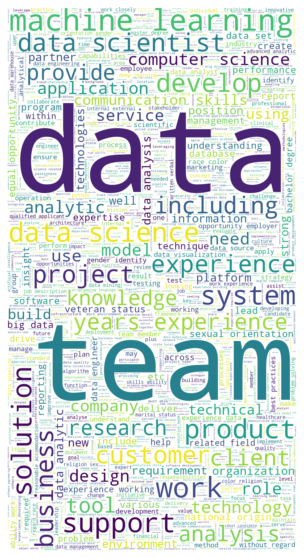

In [50]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    "remove punctuation and stop words"
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
df.to_csv('eda_data.csv')